In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import math

In [2]:
#set the same initial length
x=0.27
A=0.005
r=0.0006

x1=0.055
x2=0.215
l1=sp.sqrt(A**2+x1**2)
l2=sp.sqrt(A**2+x2**2)

x11=0.055
x22=0.05
x33=0.165
l11=sp.sqrt(A**2+x11**2)
l22=sp.sqrt((2*A)**2+x22**2)
l33=sp.sqrt(A**2+x33**2)

x111=0.055
x222=0.05
x333=0.05
x444=0.115
l111=sp.sqrt(A**2+x111**2)
l222=sp.sqrt((2*A)**2+x222**2)
l333=sp.sqrt((2*A)**2+x333**2)
l444=sp.sqrt(A**2+x444**2)



Tmax=0.009
k=25

In [3]:
# no Disc TSA system
def delta_x0 (theta) :
    delta_x0=x-sp.sqrt(x**2-(r*theta*(math.pi))**2)
    return delta_x0


In [4]:
# one Disc TSA
def delta_x1 (theta_1) :
    delta_x1=x1-sp.sqrt(l1**2-(A+r*theta_1*(math.pi))**2)
    return(delta_x1)

def delta_x2 (theta_2) :
    delta_x2=x2-sp.sqrt(l2**2-(A+r*theta_2*(math.pi))**2)
    return(delta_x2)

In [5]:
# two disc TSA
def delta_x11 (theta_1) :
    delta_x11=x11-sp.sqrt(l11**2-(A+r*theta_1*(math.pi))**2)
    return(delta_x11)

def delta_x22 (theta_2) :
    delta_x22=x22-sp.sqrt(l22**2-(2*A+r*theta_2*(math.pi))**2)
    return(delta_x22)

def delta_x33 (theta_3) :
    delta_x33=x33-sp.sqrt(l33**2-(A+r*theta_3*(math.pi))**2)
    return(delta_x33)

In [6]:
#three disc TSA
def delta_x111 (theta_1) :
    delta_x111=x111-sp.sqrt(l111**2-(A+r*theta_1*(math.pi))**2)
    return(delta_x111)

def delta_x222 (theta_2) :
    delta_x222=x222-sp.sqrt(l222**2-(2*A+r*theta_2*(math.pi))**2)
    return(delta_x222)

def delta_x333 (theta_3) :
    delta_x333=x333-sp.sqrt(l333**2-(2*A+r*theta_3*(math.pi))**2)
    return(delta_x333)

def delta_x444 (theta_4) :
    delta_x444=x444-sp.sqrt(l444**2-(A+r*theta_4*(math.pi))**2)
    return(delta_x444)

In [7]:
theta=sp.symbols("theta",real=True)

delta_x_nodisc=delta_x0(theta)

In [8]:
delta_x_one_disc=delta_x1((l1/(l1+l2))*theta)+delta_x2((l2/(l1+l2))*theta)

In [13]:
delta_x_two_disc=delta_x11((l11/(l11+l22+l33))*theta)+delta_x22((l22/(l11+l22+l33))*theta)+delta_x33((l33/(l11+l22+l33))*theta)

In [14]:
delta_x_three_disc=delta_x111((l111/(l111+l222*l333+l444))*theta)+delta_x222((l222/(l111+l222+l333+l444))*theta)+delta_x333((l333/(l111+l222+l333+l444))*theta)+delta_x444((l444/(l111+l222+l333+l444))*theta)

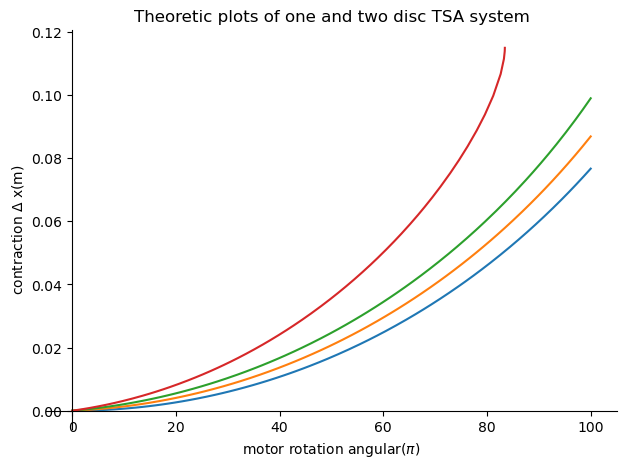

In [15]:
Line1,Line2,Line3,Line4=sp.plot(delta_x_nodisc,delta_x_one_disc,delta_x_two_disc,delta_x_three_disc,(theta,0,100),title='Theoretic plots of one and two disc TSA system',
       xlabel='motor rotation angular($\pi$)',ylabel='contraction $\Delta$ x(m)')
x_zero,y_zero=Line1.get_points()
x_one,y_one=Line2.get_points()
x_two,y_two=Line3.get_points()
x_three,y_three=Line4.get_points()

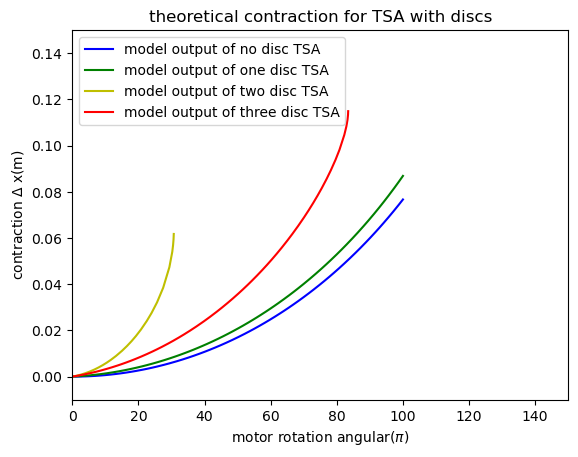

In [12]:
plt.plot(x_zero,y_zero,color='b',label='model output of no disc TSA')
plt.plot(x_one,y_one,color='g',label= 'model output of one disc TSA')
plt.plot(x_two,y_two,color='y',label='model output of two disc TSA')
plt.plot(x_three,y_three,color='r',label='model output of three disc TSA')
plt.legend()
plt.title('theoretical contraction for TSA with discs')
plt.xlabel('motor rotation angular($\pi$)')
plt.ylabel('contraction $\Delta$ x(m)')
plt.ylim((-0.01,0.15))
plt.xlim((0,150))
plt.show()